In [ ]:
pip install basemap


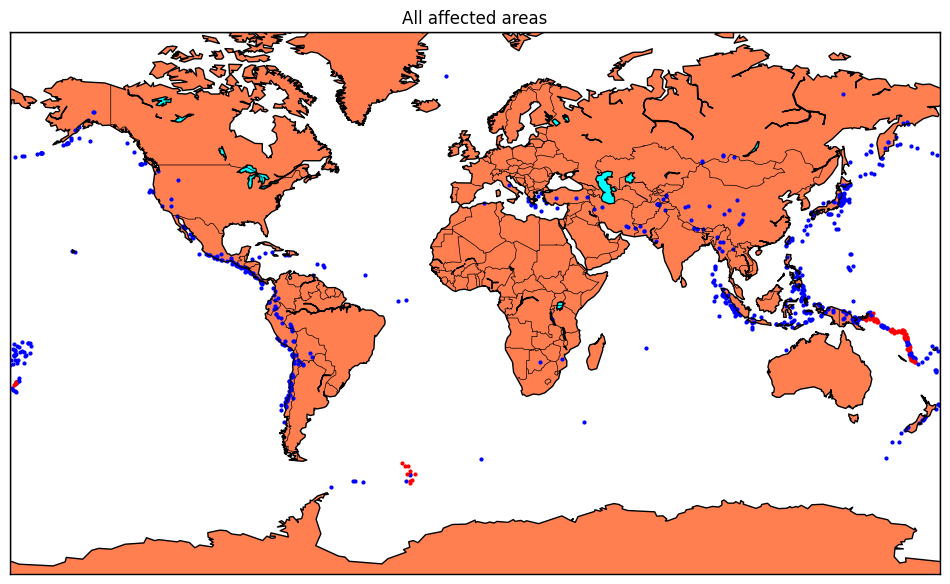

(625, 10) (157, 10) (625,) (157,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split

# Read the earthquake data from the CSV file
data = pd.read_csv("database.csv")

# Select relevant columns
selected_columns = ['magnitude', 'date_time', 'latitude', 'longitude', 'depth',
                    'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'magType',
                    'location', 'continent', 'country']

data = data[selected_columns]

# Convert date_time to Timestamp
data['Timestamp'] = pd.to_datetime(data['date_time'])
data.drop(['date_time'], axis=1, inplace=True)
data.dropna(subset=['Timestamp'], inplace=True)
data['Timestamp'] = data['Timestamp'].apply(lambda x: int(x.timestamp()))

# Create feature and target DataFrames
X = data[['Timestamp', 'latitude', 'longitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap']]
y = data[['magnitude', 'depth']]

# Create Basemap plot
m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
x, y = m(X['longitude'].tolist(), X['latitude'].tolist())

fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")

# Get the most frequently earthquaked places
most_frequent_earthquaked_places = data['location'].value_counts().index[:10]

# Color the most frequently earthquaked places red
for i in range(len(x)):
    if data['location'].iloc[i] in most_frequent_earthquaked_places:
        m.plot(x[i], y[i], "o", markersize=2, color='red')
    else:
        m.plot(x[i], y[i], "o", markersize=2, color='blue')

m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
